In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import keras
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/compressive-strength-of-concrete/compresive_strength_concrete.csv


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Compressive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [3]:
df = pd.read_csv('/kaggle/input/compressive-strength-of-concrete/compresive_strength_concrete.csv')

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

- There are no missing values 
- There are no categorical variables

In [6]:
df.shape

(1030, 9)

- 1030 records
- 8 features
- 1 output

# Checking Missing Values

In [7]:
df.isnull().sum() # no missing values

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [8]:
for i in range(len(df.columns)):
    print(df.iloc[:, i].value_counts())
    print('#'*25)

425.0    20
362.6    20
251.4    15
310.0    14
446.0    14
331.0    13
250.0    13
475.0    13
349.0    12
387.0    12
236.0    11
165.0    11
500.0    10
194.7    10
190.3    10
380.0    10
213.7    10
213.5    10
339.0    10
212.0     9
540.0     9
350.0     8
424.0     8
153.0     8
359.0     8
491.0     8
277.0     8
313.3     8
525.0     7
480.0     7
296.0     7
200.0     7
393.0     7
238.1     7
375.0     7
385.0     6
313.0     6
284.0     6
427.5     6
203.5     6
237.5     6
374.0     6
198.6     6
167.0     6
139.6     6
266.0     6
289.0     6
332.5     6
304.0     6
469.0     5
218.9     5
222.4     5
401.8     5
286.3     5
212.5     5
214.9     5
322.0     5
168.0     5
172.4     5
277.2     5
337.9     5
251.8     5
155.0     5
230.0     5
389.9     5
290.4     5
376.0     5
379.5     5
168.9     5
229.7     5
173.5     5
212.6     5
231.8     5
149.0     5
213.8     5
212.1     5
307.0     5
173.8     5
190.0     5
190.7     5
439.0     5
295.7     5
178.0     5
233.

- Superplasticizer
- Fly Ash
- Blast Furnace

These 3 columns have zeros, which should be replaced by mean

In [9]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [10]:
missing_cols = ['Superplasticizer (component 5)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)']

for col in missing_cols:
    df.loc[:, col] = df.loc[:, col].replace(0.0, df.loc[:, col].mean())

In [11]:
for i in range(len(df.columns)):
    print(df.iloc[:, i].value_counts())
    print('#'*25)

425.0    20
362.6    20
251.4    15
310.0    14
446.0    14
331.0    13
250.0    13
475.0    13
349.0    12
387.0    12
236.0    11
165.0    11
500.0    10
194.7    10
190.3    10
380.0    10
213.7    10
213.5    10
339.0    10
212.0     9
540.0     9
350.0     8
424.0     8
153.0     8
359.0     8
491.0     8
277.0     8
313.3     8
525.0     7
480.0     7
296.0     7
200.0     7
393.0     7
238.1     7
375.0     7
385.0     6
313.0     6
284.0     6
427.5     6
203.5     6
237.5     6
374.0     6
198.6     6
167.0     6
139.6     6
266.0     6
289.0     6
332.5     6
304.0     6
469.0     5
218.9     5
222.4     5
401.8     5
286.3     5
212.5     5
214.9     5
322.0     5
168.0     5
172.4     5
277.2     5
337.9     5
251.8     5
155.0     5
230.0     5
389.9     5
290.4     5
376.0     5
379.5     5
168.9     5
229.7     5
173.5     5
212.6     5
231.8     5
149.0     5
213.8     5
212.1     5
307.0     5
173.8     5
190.0     5
190.7     5
439.0     5
295.7     5
178.0     5
233.

# Univariate Distribution Plots

- These plots will give an idea about
1. Skewness of data
2. Outliers

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056

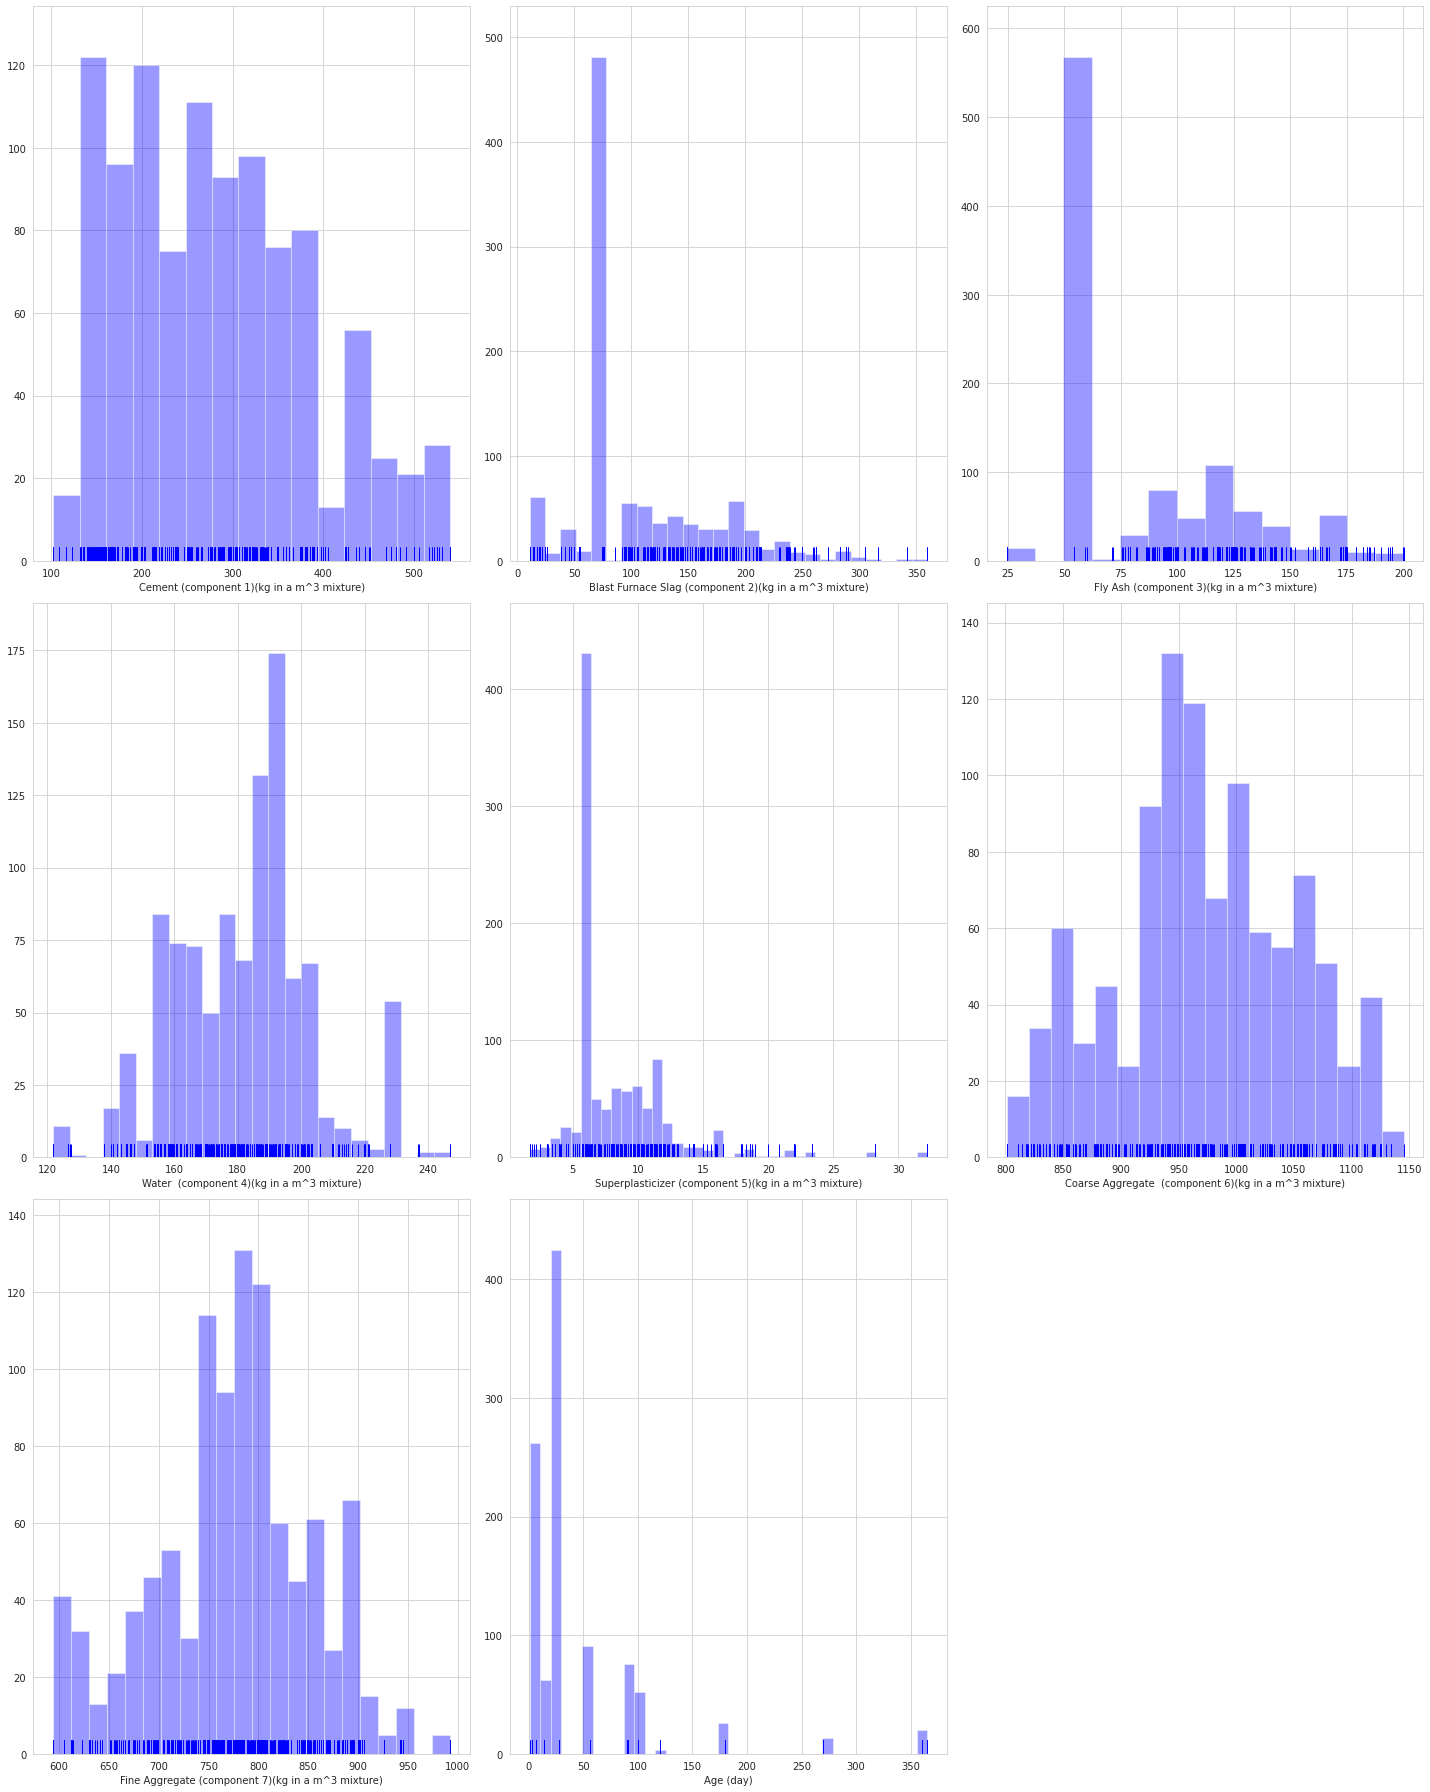

In [12]:
fig = plt.figure(figsize=(20,25))

sns.set_style('whitegrid')

for i in range(len(df.columns) - 1): # - 1 because I dont want to plot Concrete compressive strength
    fig.add_subplot(3, 3, i+1)
    sns.distplot(df.iloc[:, i].dropna(), rug=True, kde_kws = {'bw':0.1}, color = 'b', kde=False)
    plt.xlabel(df.columns[i])

plt.tight_layout()

- Box plots will give more information about outliers

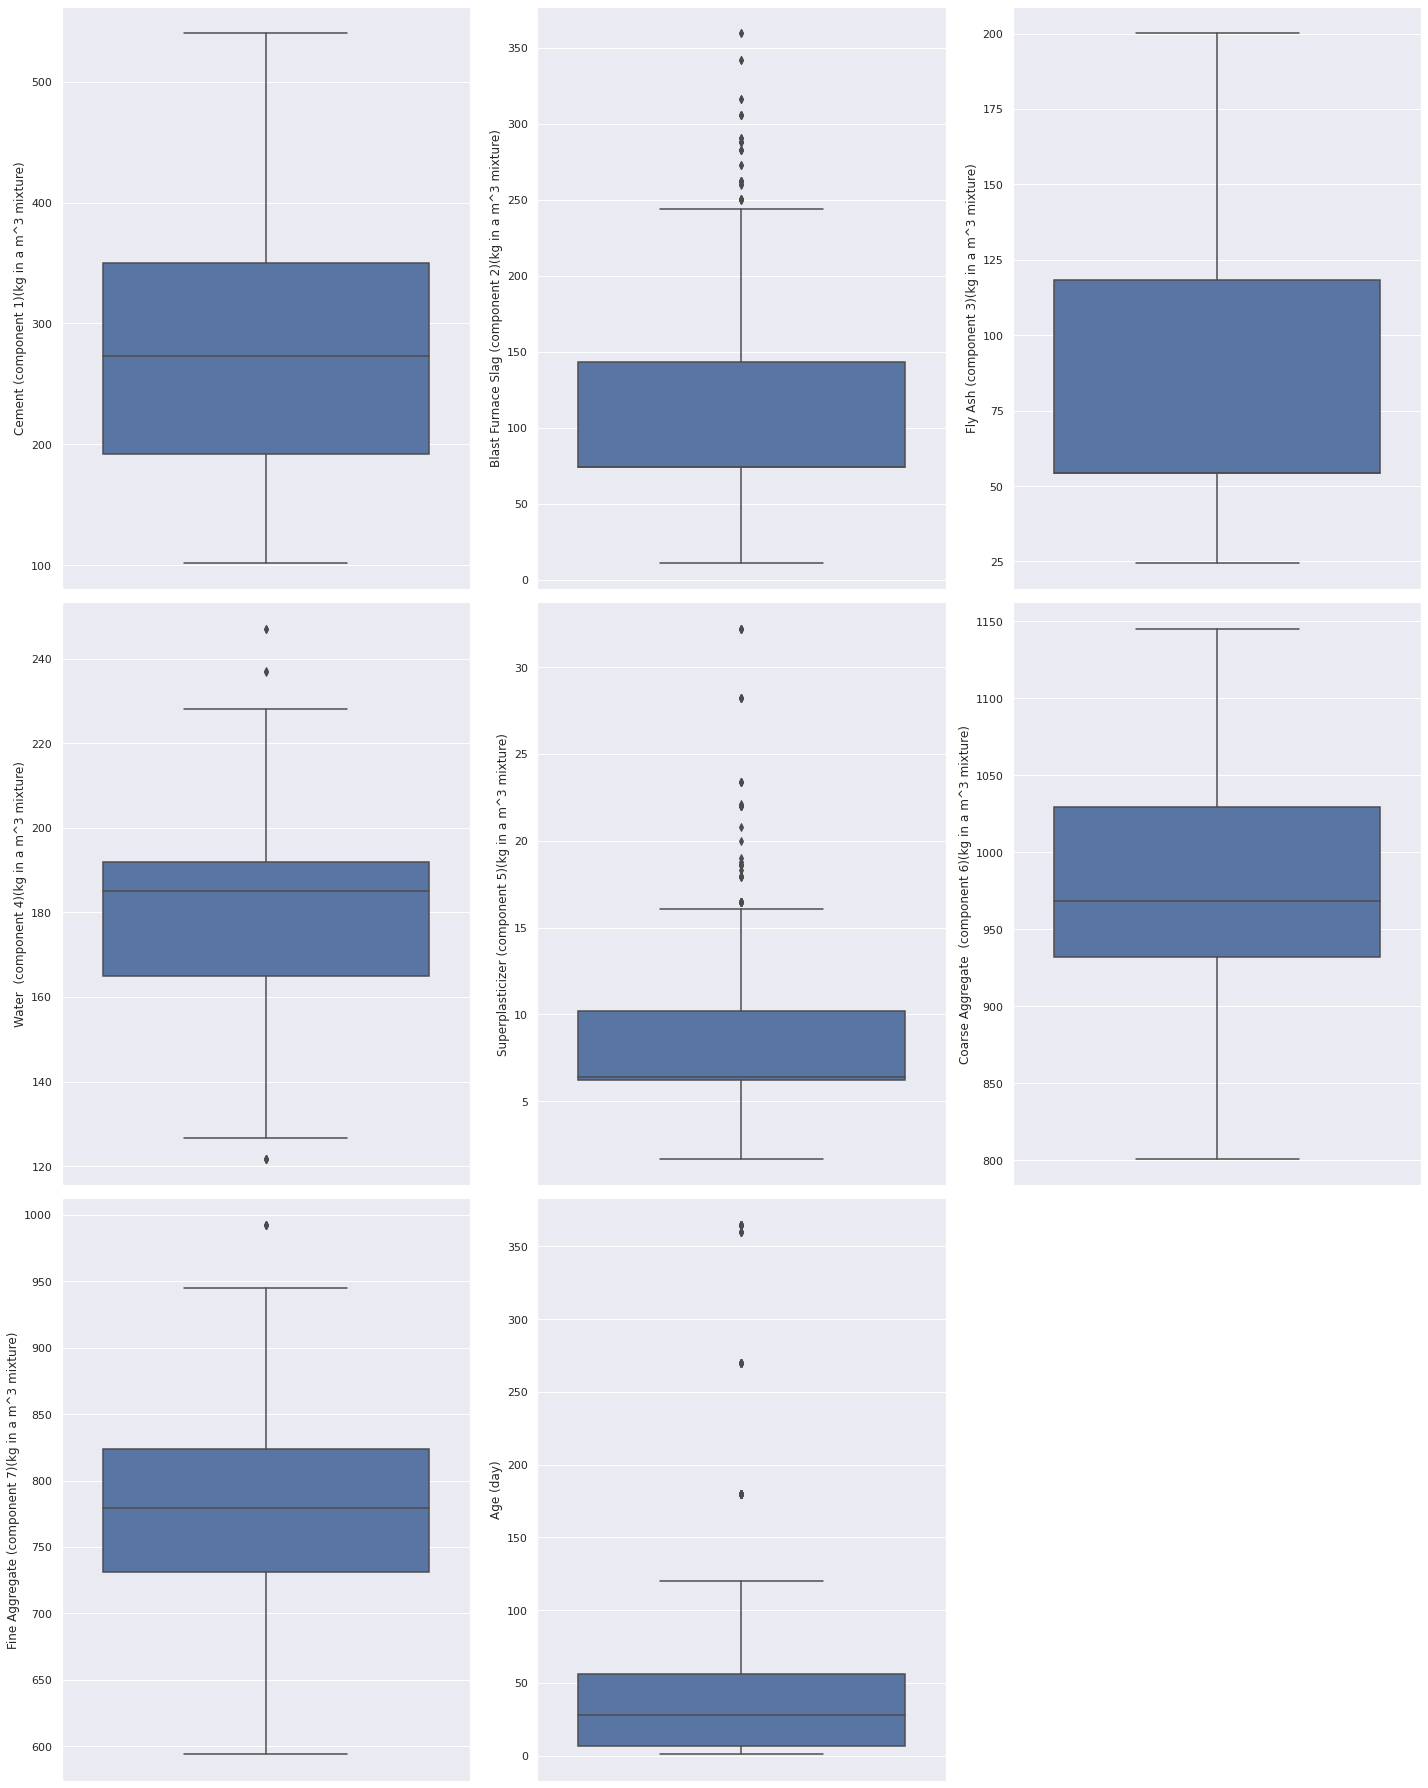

In [13]:
fig = plt.figure(figsize = (20,25))

sns.set(style = 'darkgrid')

for i in range(len(df.columns)-1):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(y = df.iloc[:,i].dropna())
plt.tight_layout()

- There are some outliers in Age
- Few outliers are in Superplasticizer, Water

# Bivariate Analysis

- Bivariate Analaysis (Plot of each feature with prediction target) will give a better understanding of how each feature is related to the target (Concrete Compressive Strength)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

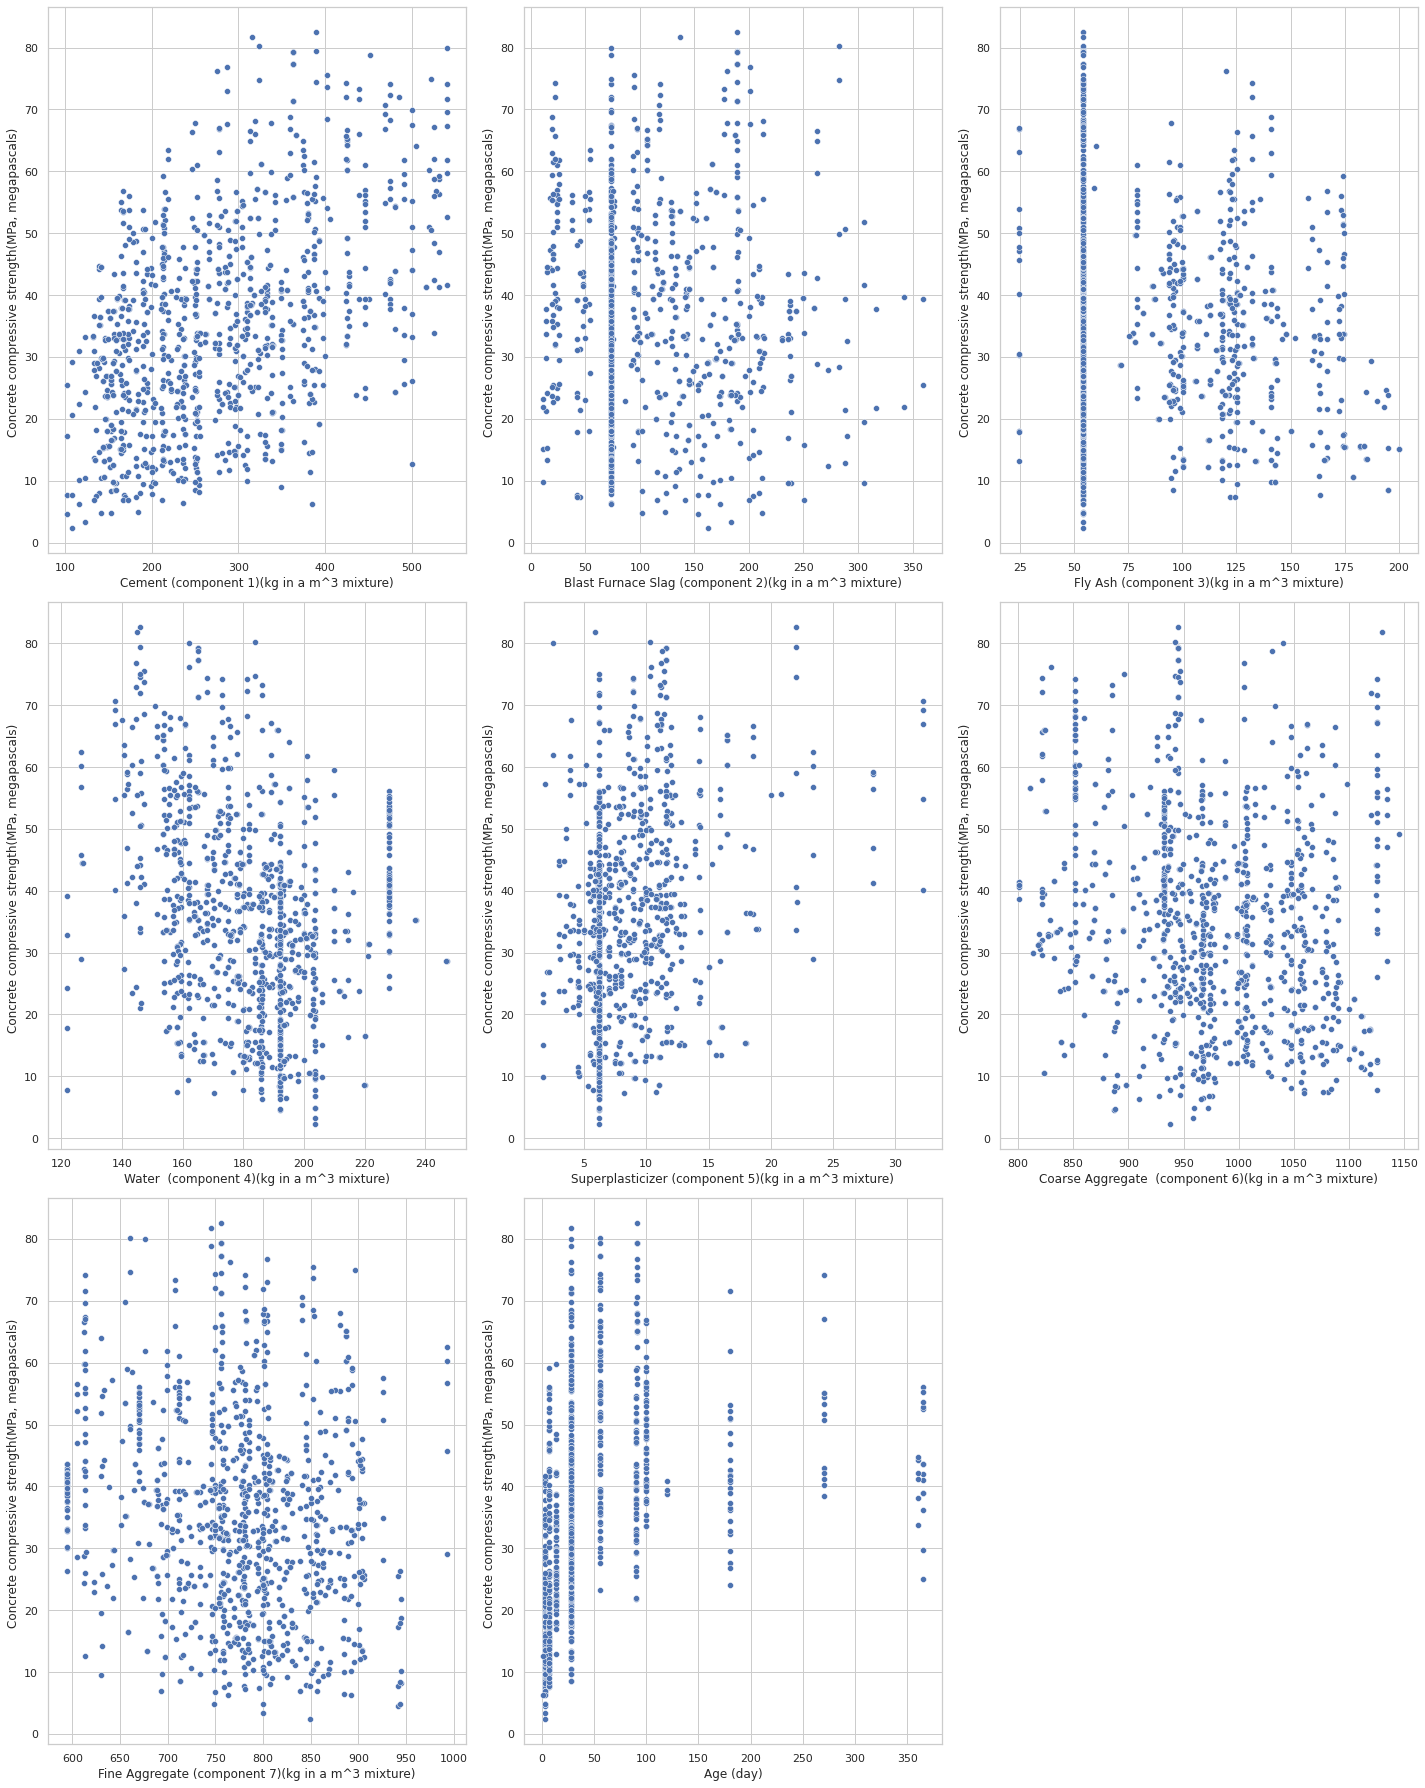

In [14]:
fig = plt.figure(figsize = (20,25))

sns.set(style = 'whitegrid')

for i in range(len(df.columns)-1):
    fig.add_subplot(3, 3, i+1)
    sns.scatterplot(df.iloc[:,i].dropna(), df.loc[:, 'Concrete compressive strength(MPa, megapascals) '])
plt.tight_layout()
plt.show()


# Taking one final look on outliers - Regression Plots

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

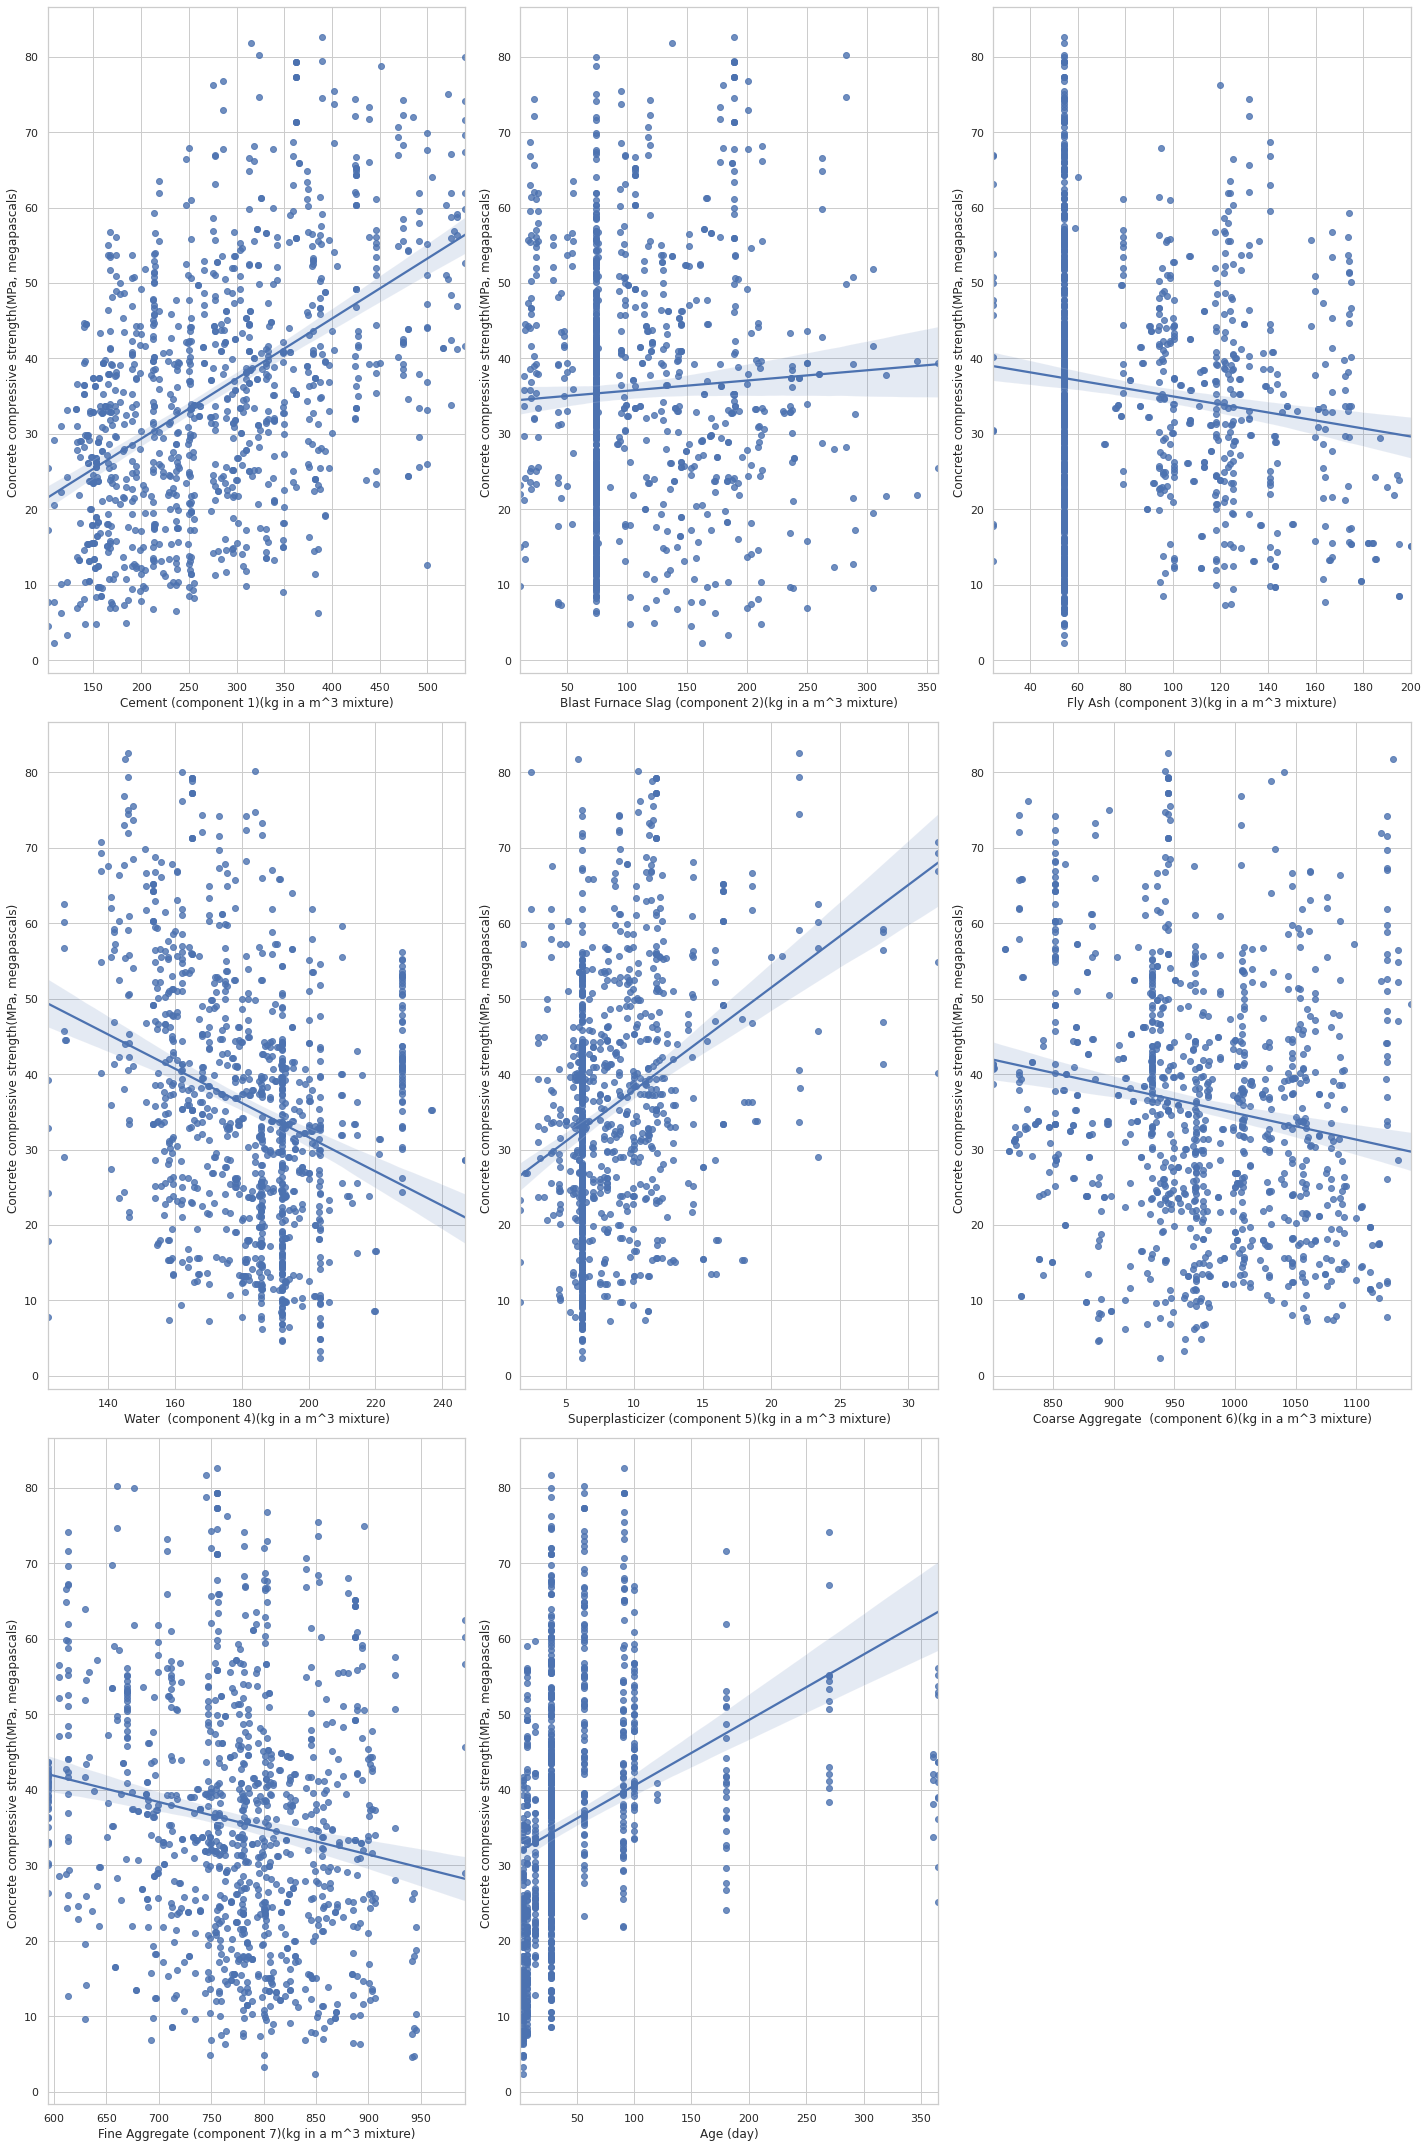

In [15]:
fig = plt.figure(figsize = (20,30))

for i in range(len(df.columns)-1):
    fig.add_subplot(3, 3, i+1)
    sns.regplot(df.iloc[:,i], df.loc[:, 'Concrete compressive strength(MPa, megapascals) '])
plt.tight_layout()

- It is not mentioned in the assignment to take care of outliers, so I will leave them here for now

# Splitting Data

- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels)

In [16]:
# shuffling data
df = df.sample(frac=1).reset_index(drop=True)

# total data = 1030

data = df.drop('Concrete compressive strength(MPa, megapascals) ', 1)
targets = df.loc[:, 'Concrete compressive strength(MPa, megapascals) ']

In [17]:
data.shape

(1030, 8)

In [18]:
targets.shape

(1030,)

In [19]:
train_data = data.iloc[0:515]
train_targets = targets.iloc[0:515]

val_data = data.iloc[515:721]
val_targets = targets.iloc[515:721]

test_data = data.iloc[721:]
test_targets =targets.iloc[721:]

In [20]:
print(train_data.shape)
print(train_targets.shape)
print('#'*25)
print(val_data.shape)
print(val_targets.shape)
print('#'*25)
print(test_data.shape)
print(test_targets.shape)

(515, 8)
(515,)
#########################
(206, 8)
(206,)
#########################
(309, 8)
(309,)


# Standardizing input variables

In [21]:
mean = train_data.mean()
std = train_data.std()

train_data -= mean
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

In [22]:
train_data.head(2) # TODO : PLOT TO SEE IF DISTRIBUTIONS ARE NOW NORMAL/ GAUSSIAN OR NOT ?!?!?!?!

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,0.108303,-0.543567,-0.746015,0.132865,-0.55244,1.296570,0.306307,-0.622061
1,0.346415,-0.543567,-0.746015,0.132865,-0.55244,1.143866,0.154922,-0.622061


# Building and Compiling model

In [23]:
from keras import models
from keras import layers

def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],)))
    
    model.add(layers.Dense(8, activation='relu'))
        
    model.add(layers.Dense(6, activation='relu'))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    
    
    return model
    

# Training the model

In [24]:
model = build_model()

history = model.fit(train_data, train_targets, validation_data = (val_data, val_targets), epochs=100, verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 40ms/step - loss: 1590.6964 - mae: 36.0855 - val_loss: 1425.0251 - val_mae: 34.2948
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 1502.5656 - mae: 35.1548 - val_loss: 1405.5929 - val_mae: 34.0334
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 1502.4259 - mae: 35.3333 - val_loss: 1381.4662 - val_mae: 33.7073
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 1548.4602 - mae: 35.8325 - val_loss: 1350.8788 - val_mae: 33.2896
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 1538.2335 - mae: 35.3966 - val_loss: 1310.8362 - val_mae: 32.7364
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 1433.2019 - mae: 34.0608 - val_loss: 1257.6337 - val_mae: 31.9927
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 1434.4363 - mae: 34.3271 - val_loss: 1186.1924 - val_mae: 30.9672
Epoch 8/100
17/17 [=======

# Learning Curves

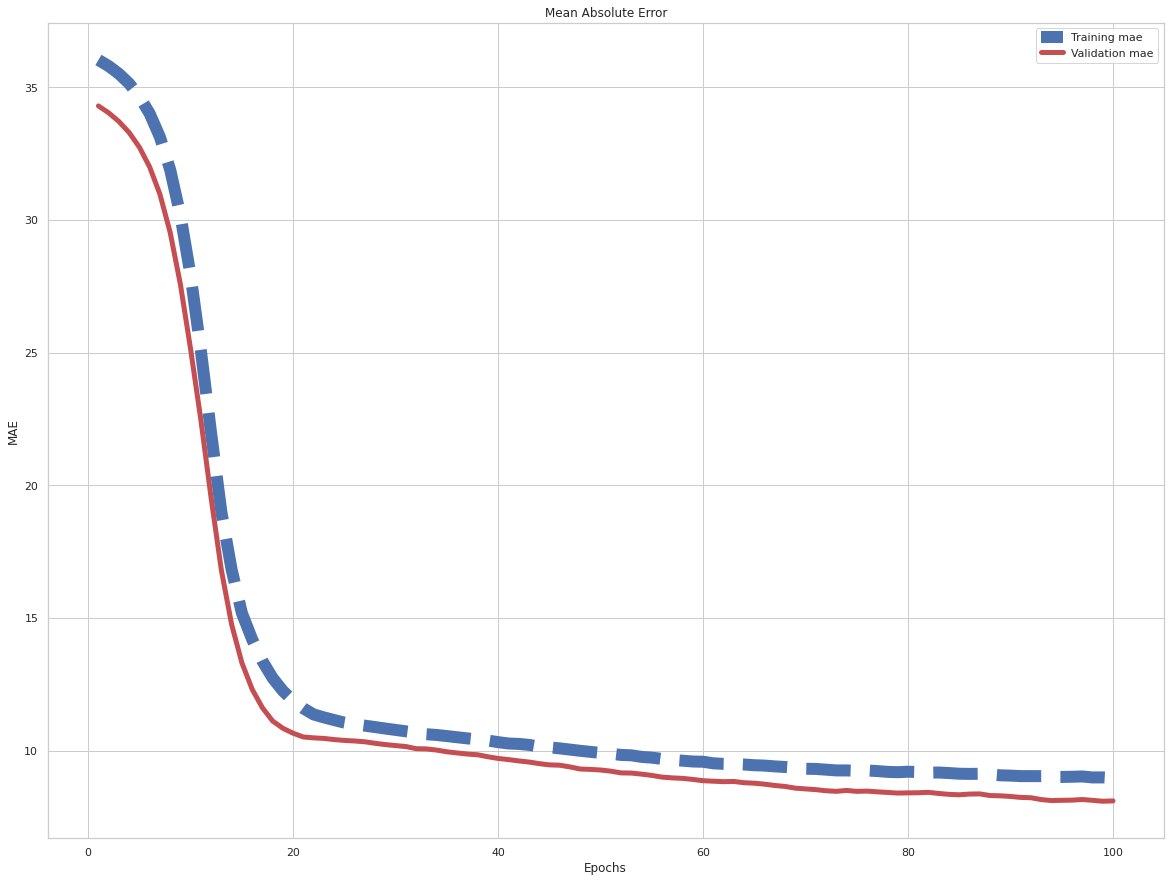

In [25]:
plt.figure(figsize=(20,15))

mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'b--', label='Training mae', linewidth=12)
plt.plot(epochs, val_mae, 'r', label='Validation mae', linewidth=5)

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()
plt.show()

- After around 80 epochs, overfitting starts 

# Adding Regularizer

In [26]:
from keras import layers, models, regularizers

def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.L2(0.001)))
    
    model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
        
    model.add(layers.Dense(6, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    
    
    return model

In [27]:
model_1 = build_model()

history_1 = model_1.fit(train_data, train_targets, validation_data = (val_data, val_targets), epochs=100, verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 19ms/step - loss: 1541.2524 - mae: 35.8681 - val_loss: 1413.6044 - val_mae: 34.1537
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 1510.9747 - mae: 35.2912 - val_loss: 1395.5132 - val_mae: 33.8995
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 1471.6807 - mae: 34.7607 - val_loss: 1371.8346 - val_mae: 33.5588
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 1488.1264 - mae: 34.7635 - val_loss: 1339.5740 - val_mae: 33.0849
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 1450.9806 - mae: 34.4333 - val_loss: 1294.6613 - val_mae: 32.4180
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 1406.2304 - mae: 33.7138 - val_loss: 1239.3490 - val_mae: 31.5762
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 1346.5563 - mae: 32.5579 - val_loss: 1168.6873 - val_mae: 30.4575
Epoch 8/100
17/17 [=======

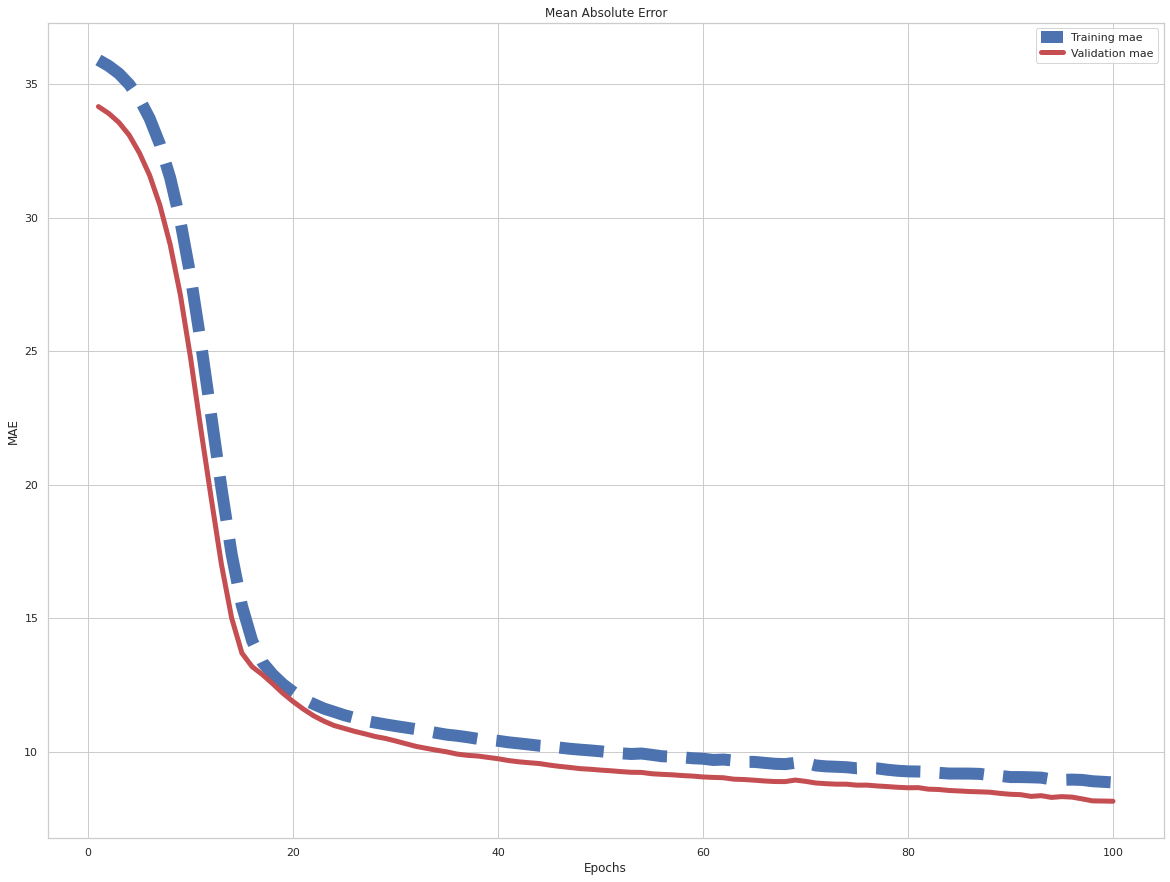

In [28]:
plt.figure(figsize=(20,15))

mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'b--', label='Training mae', linewidth=12)
plt.plot(epochs, val_mae, 'r', label='Validation mae', linewidth=5)

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()
plt.show()

# Increasing Epochs (with Regularizer)

In [29]:
from keras import layers, models, regularizers

def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.L2(0.001)))
    
    model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
        
    model.add(layers.Dense(6, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    
    
    return model

In [30]:
model_2 = build_model()

history_2 = model_2.fit(train_data, train_targets, validation_data = (val_data, val_targets), epochs=500, verbose=1)

Epoch 1/500
17/17 [==============================] - 1s 19ms/step - loss: 1648.3825 - mae: 36.7626 - val_loss: 1465.3275 - val_mae: 34.8323
Epoch 2/500
17/17 [==============================] - 0s 5ms/step - loss: 1583.6914 - mae: 36.1239 - val_loss: 1454.7102 - val_mae: 34.6991
Epoch 3/500
17/17 [==============================] - 0s 5ms/step - loss: 1606.7571 - mae: 36.4843 - val_loss: 1442.0936 - val_mae: 34.5401
Epoch 4/500
17/17 [==============================] - 0s 5ms/step - loss: 1516.1300 - mae: 35.2204 - val_loss: 1425.4049 - val_mae: 34.3267
Epoch 5/500
17/17 [==============================] - 0s 5ms/step - loss: 1569.3065 - mae: 35.9495 - val_loss: 1404.3931 - val_mae: 34.0482
Epoch 6/500
17/17 [==============================] - 0s 5ms/step - loss: 1509.2140 - mae: 35.4817 - val_loss: 1379.7731 - val_mae: 33.7114
Epoch 7/500
17/17 [==============================] - 0s 5ms/step - loss: 1508.9351 - mae: 35.3413 - val_loss: 1351.5630 - val_mae: 33.3263
Epoch 8/500
17/17 [=======

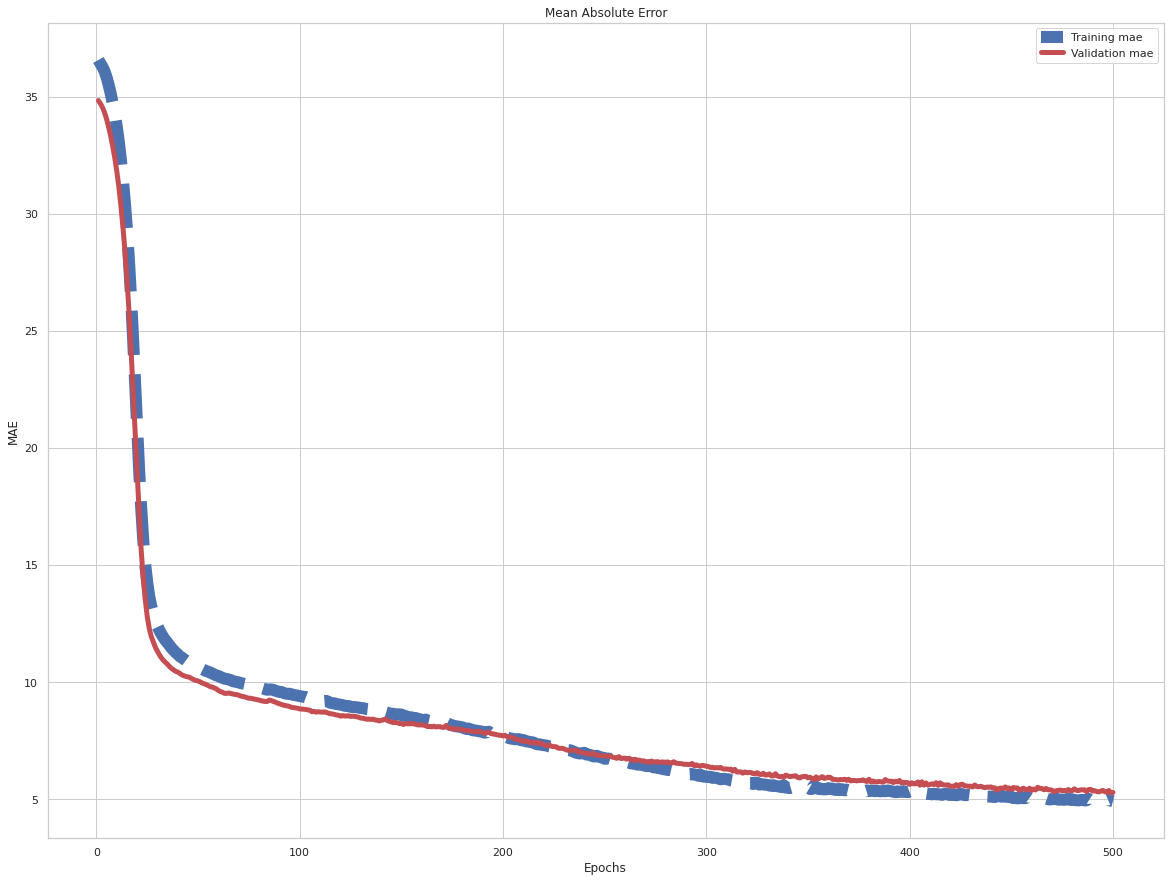

In [31]:
plt.figure(figsize=(20,15))

mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'b--', label='Training mae', linewidth=12)
plt.plot(epochs, val_mae, 'r', label='Validation mae', linewidth=5)

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()
plt.show()

# Adding Dropout


In [32]:
from keras import layers, models, regularizers

def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],), ))
    
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Dense(8, activation='relu', ))
        
    model.add(layers.Dropout(0.3))  
        
    model.add(layers.Dense(6, activation='relu', ))
    
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    
    
    return model

In [33]:
model_3 = build_model()

history_3 = model_3.fit(train_data, train_targets, validation_data = (val_data, val_targets), epochs=100, verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 1565.3206 - mae: 36.0439 - val_loss: 1423.4683 - val_mae: 34.2516
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 1419.1424 - mae: 34.2844 - val_loss: 1411.4985 - val_mae: 34.0823
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 1554.5337 - mae: 35.7635 - val_loss: 1396.1005 - val_mae: 33.8634
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 1516.0474 - mae: 35.3180 - val_loss: 1375.6365 - val_mae: 33.5696
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 1513.2177 - mae: 35.1660 - val_loss: 1349.8093 - val_mae: 33.1931
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 1472.2625 - mae: 34.6230 - val_loss: 1318.0995 - val_mae: 32.7248
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 1452.2979 - mae: 34.3699 - val_loss: 1276.7606 - val_mae: 32.1068
Epoch 8/100
17/17 [=======

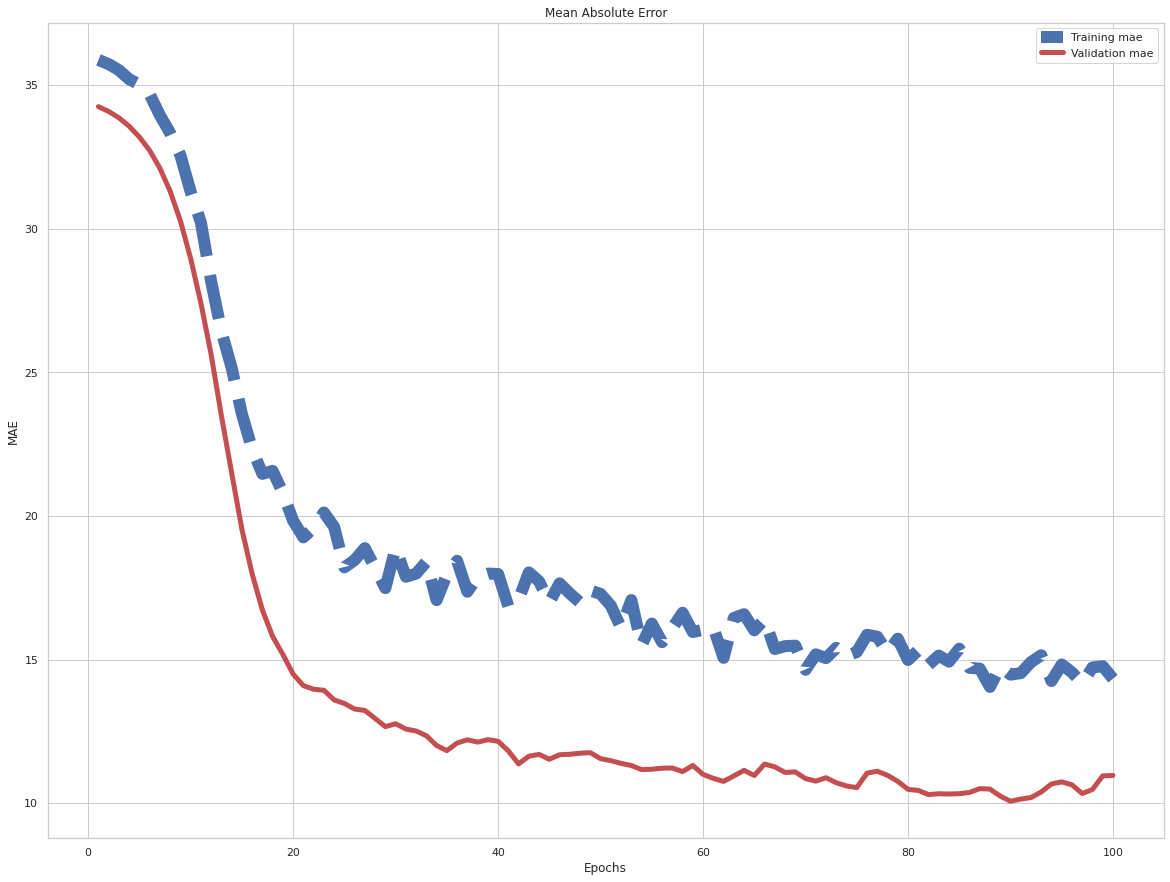

In [34]:
plt.figure(figsize=(20,15))

mae = history_3.history['mae']
val_mae = history_3.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'b--', label='Training mae', linewidth=12)
plt.plot(epochs, val_mae, 'r', label='Validation mae', linewidth=5)

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()
plt.show()

# Changing Layer Architecture

In [35]:
from keras import layers, models, regularizers

def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(16, activation='relu', input_shape=(train_data.shape[1],), ))
    
   
    
    model.add(layers.Dense(8, activation='relu', ))
        
 
        
    model.add(layers.Dense(3, activation='relu', ))
    
   
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    
    
    return model

In [36]:
model_4 = build_model()

history_4 = model_4.fit(train_data, train_targets, validation_data = (val_data, val_targets), epochs=100, verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 1535.5234 - mae: 35.8078 - val_loss: 1436.8539 - val_mae: 34.4580
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 1637.6171 - mae: 36.7768 - val_loss: 1423.9426 - val_mae: 34.2741
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 1592.8358 - mae: 36.2249 - val_loss: 1406.3326 - val_mae: 34.0287
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 1577.5411 - mae: 35.9639 - val_loss: 1381.5129 - val_mae: 33.6827
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 1445.3374 - mae: 34.5926 - val_loss: 1344.9744 - val_mae: 33.1771
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 1545.9327 - mae: 35.6429 - val_loss: 1293.5575 - val_mae: 32.4525
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 1471.1370 - mae: 34.5383 - val_loss: 1229.7971 - val_mae: 31.5280
Epoch 8/100
17/17 [=======

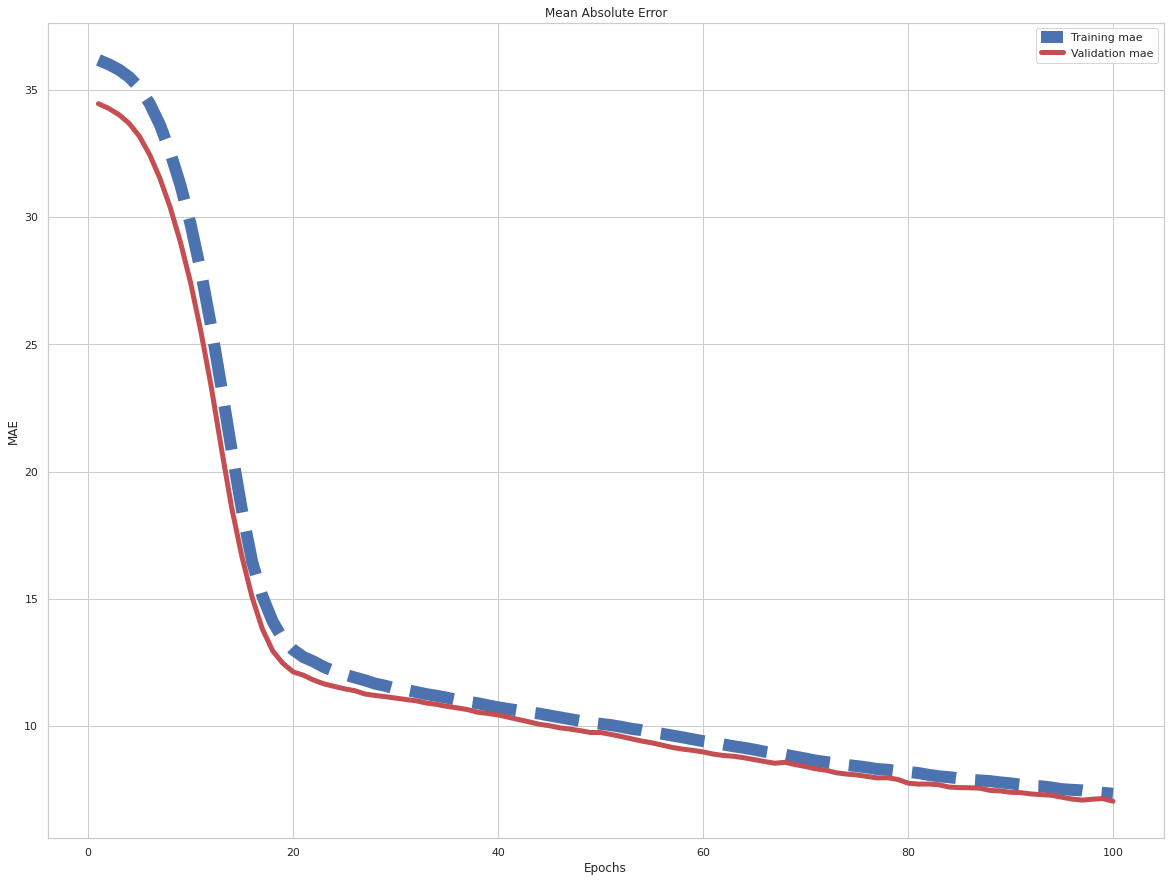

In [37]:
plt.figure(figsize=(20,15))

mae = history_4.history['mae']
val_mae = history_4.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'b--', label='Training mae', linewidth=12)
plt.plot(epochs, val_mae, 'r', label='Validation mae', linewidth=5)

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()
plt.show()

# Prediction

## Im choosing model_2 (500 epochs, regularizer) for predictions

In [38]:
predictions = model_2.predict(test_data)

In [39]:
predictions.shape

(309, 1)

In [40]:
predictions = predictions.reshape(309)

In [41]:
output = pd.DataFrame({'Actual': test_targets})

In [42]:
output['Predicted'] = predictions

In [43]:
output.reset_index(inplace=True)

In [44]:
output['Absolute Error'] = np.abs(output['Predicted'] - output['Actual'])

In [45]:
output

,index,Actual,Predicted,Absolute Error
0,721,52.44,48.845554,3.594446
1,722,36.35,37.861874,1.511874
2,723,40.86,40.268867,0.591133
3,724,62.94,51.915680,11.024320
4,725,39.42,40.329556,0.909556
5,726,42.55,37.429836,5.120164
6,727,71.70,67.917648,3.782352
7,728,24.85,26.512148,1.662148
8,729,18.29,24.139692,5.849692
9,730,34.56,40.389278,5.829278


### mean, max error values

-> mean error 5.6
-> median error 4.5
-> min error 0.02
-> max error 26.3

In [46]:
output.loc[:, 'Absolute Error'].describe()

count    309.000000
mean       5.184042
std        4.339504
min        0.010457
25%        2.162546
50%        3.999267
75%        7.050725
max       33.940632
Name: Absolute Error, dtype: float64